In [179]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from src import data
from portfolio_design.src.data import get_monthly_market_data, compute_monthly_returns_from_mmd
from portfolio_design.src import analysis as an
from portfolio_design.src import edhec_risk_kit as erk

%matplotlib inline

In [243]:
r_df = compute_monthly_returns_from_mmd(get_monthly_market_data(
  tickers = ['AC.TO', 'SOXX', 'DIS', 'NVDA', 'SPY', 'BB.TO', 'DHR', 'COST'],
  interval = '1mo'
).ffill(axis = 0))

# r_df = (md_df['adjusted_close'] / md_df['open'] - 1).ffill(axis = 0)

r_df.head()

[*********************100%***********************]  8 of 8 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.9/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,AC.TO,BB.TO,COST,DHR,DIS,NVDA,SOXX,SPY
date,,,,,,,,
1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-02-01,NaN,NaN,NaN,-0.061538,0.047058,NaN,NaN,NaN
1985-03-01,NaN,NaN,NaN,0.000000,0.011237,NaN,NaN,NaN
1985-04-01,NaN,NaN,NaN,0.000000,-0.023185,NaN,NaN,NaN
1985-05-01,NaN,NaN,NaN,-0.049182,0.135400,NaN,NaN,NaN


In [244]:
r_pre_df = r_df['2015':'2020-01-01']
r_post_df = r_df['2020-02-01':]

In [268]:
er_pre = erk.annualize_rets(r_pre_df, 24)
er_pre.sort_values(ascending = False)

NVDA     1.678308
DHR      0.680021
AC.TO    0.679370
SOXX     0.501183
COST     0.421533
SPY      0.242606
DIS      0.201805
BB.TO   -0.164839
dtype: float64

In [262]:
er_post = erk.annualize_rets(r_post_df, 24)
er_post

AC.TO   -0.472574
BB.TO    1.644129
COST     0.205506
DHR      0.597297
DIS      0.763374
NVDA     2.476057
SOXX     1.287944
SPY      0.424853
dtype: float64

In [263]:
er_pre_cov = r_pre_df.cov()
er_post_cov = r_post_df.cov()
er_pre_corr = r_pre_df.corr()
er_post_corr = r_post_df.corr()

<AxesSubplot:>

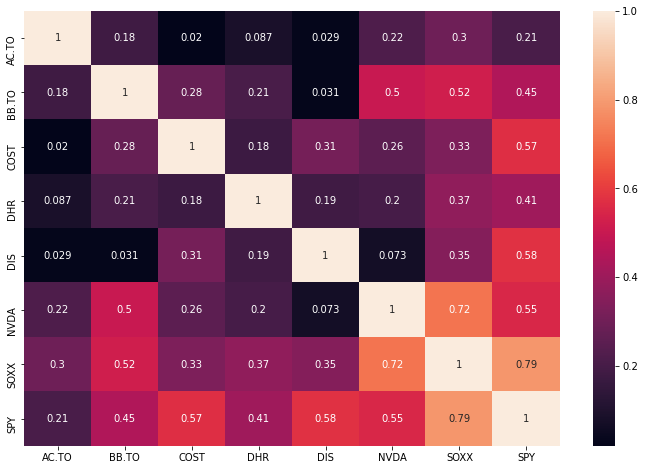

In [264]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
sns.heatmap(er_pre_corr, annot = True)

In [265]:
er_post_cov

,AC.TO,BB.TO,COST,DHR,DIS,NVDA,SOXX,SPY
AC.TO,0.078904,0.009458,0.005707,0.001794,0.024394,0.003241,0.016257,0.014992
BB.TO,0.009458,0.103827,-0.000251,0.006142,0.000964,-0.004130,0.004984,0.003815
COST,0.005707,-0.000251,0.002657,0.002059,0.002459,0.001538,0.001886,0.001968
DHR,0.001794,0.006142,0.002059,0.006016,0.001084,0.000600,0.002589,0.002530
DIS,0.024394,0.000964,0.002459,0.001084,0.014861,0.002726,0.006950,0.007018
NVDA,0.003241,-0.004130,0.001538,0.000600,0.002726,0.009558,0.002923,0.002537
SOXX,0.016257,0.004984,0.001886,0.002589,0.006950,0.002923,0.005642,0.004596
SPY,0.014992,0.003815,0.001968,0.002530,0.007018,0.002537,0.004596,0.004655


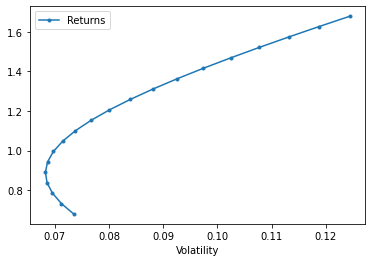

In [266]:
s = ['NVDA', 'DHR']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]
ef = erk.plot_ef2(20, er_s, er_s_cov)

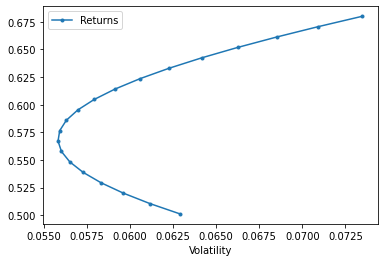

In [267]:
s = ['SOXX', 'DHR']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]
ef = erk.plot_ef2(20, er_s, er_s_cov)

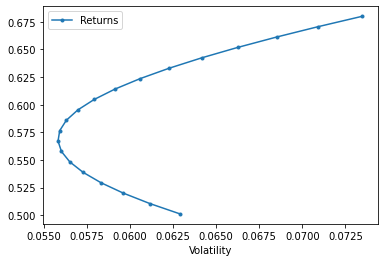

In [267]:
s = ['SOXX', 'DHR']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]
ef = erk.plot_ef2(20, er_s, er_s_cov)

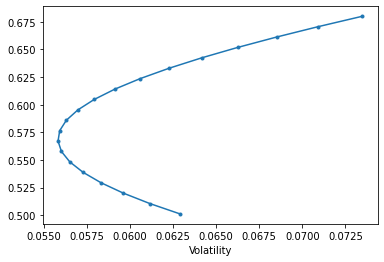

In [279]:
s = ['SOXX', 'DHR']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]
ef = erk.plot_ef(20, er_s, er_s_cov)

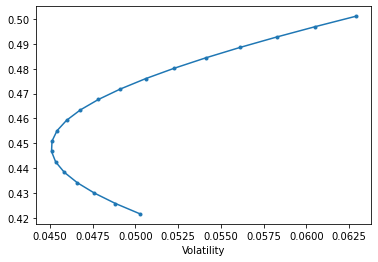

In [316]:
s = ['SOXX', 'COST']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]
ef = erk.plot_ef(20, er_s, er_s_cov)

[0.41985231 0.58014769]
0.4549741646018557


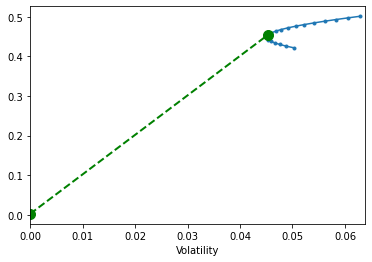

In [308]:
s = ['SOXX', 'COST']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]
ef = erk.plot_ef(20, er_s, er_s_cov, show_cml = True, riskfree_rate = 0.0025)

In [310]:
cost_price = 413.01
soxx_price = 502.84

In [312]:
10000 * 0.34 / soxx_price

6.7615941452549535

In [314]:
a = 6 * soxx_price
b = 16 * cost_price
a+b

9625.2

In [313]:
10000 * (1-0.34) / cost_price

15.980242609137791

[0.33677347 0.66322653]
0.44835693603782995


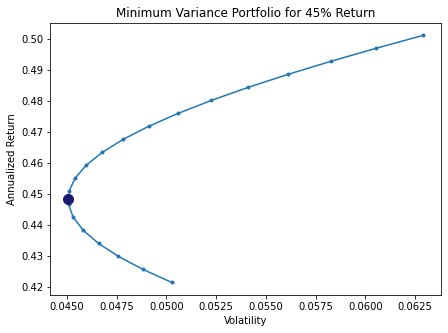

In [405]:
s = ['SOXX', 'COST']
er_s = er_pre[s]
er_s_cov = er_pre_cov.loc[s, s]


ef = erk.plot_ef(20, er_s, er_s_cov, show_gmv = True);
plt.xlabel('Volatility')
plt.ylabel('Annualized Return')
plt.title('Minimum Variance Portfolio for 45% Return');

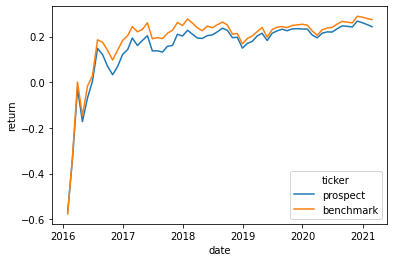

In [392]:
prospect = r_df[['SOXX', 'COST']].multiply([0.33677347, 0.66322653]).sum(axis = 1).rename('prospect').to_frame()
benchmark = (r_df[['COST', 'SOXX']].sum(axis = 1) / 2).rename('benchmark').to_frame()
plot_df = pd.concat([prospect, benchmark], axis = 1)

an.plot_annualized_return_from_date(
  plot_df,
  '2016-01-01'
)